# Bitcoin Price Prediction - Documentation
## BS Data Science Project - Recurrent Bitcoin Network

This notebook contains a brief documentation on retrieving data from [Messari](https://messari.io/) through its [API](https://messari.io/api/docs). Method of data collection would be through web API with a `json` response.

### Prerequesites

Before running this notebook, several python packages are needed to be installed as shown in the following cell. In addition, changing of working directory within the local repository was done.

In [1]:
# Built-in packages
import os
from datetime import datetime

In [2]:
os.chdir('../src')

In [3]:
# Packages to be installed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Local python functions
import collect
import pipeline

In [4]:
%load_ext tensorboard

In [5]:
# Notebook Execution Time
print('Current time: {}'.format(datetime.now()))

Current time: 2022-03-06 15:40:17.598084


In [6]:
# Remove the comment if you intend to apply your Messari API key
# os.environ['MESSARI_API_KEY'] = <insert_key_here>

In [7]:
# Check if the API key is set
'MESSARI_API_KEY' in os.environ

False

In [8]:
collector = collect.MessariCollector(api_key=os.getenv('MESSARI_API_KEY'))

### Data
The expected data would be a data frame of time series data denoted by its columns and it would be splitted, normalized, and be fed for model training and testing. In this project, we would only use daily time series data from 2016 to 2020 as the training set, while 2021 data would be used as a test set.

The following table below shows a sample of metrics to be used as features for Bitcoin price forecasting, along with their descriptions and sources. For full list of metrics, see `bitcoin_metrics.csv`.

In [9]:
df_metrics = collector.get_metrics()
btc_metrics = df_metrics.get_bitcoin_metrics()
btc_metrics.to_csv('../raw/bitcoin_metrics.csv', index=False)

btc_metrics.head(10)

,name,description,values_schema,minimum_interval,role_restriction,source_attribution
metric_id,,,,,,
act.addr.cnt,Active Addresses Count,The sum count of unique addresses that were ac...,{'active_addresses': 'The sum count of unique ...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
blk.cnt,Block Count,The sum count of blocks created each day,{'block_count': 'The sum count of blocks creat...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
blk.size.byte,Block Size (bytes),The sum of the size (in bytes) of all blocks c...,{'block_count': 'The sum of the size (in bytes...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
blk.size.bytes.avg,Average Block Size (bytes),The mean size (in bytes) of all blocks created,{'block_count': 'The mean size (in bytes) of a...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
daily.shp,Sharpe Ratio,The Sharpe ratio (performance of the asset com...,{'sharpe_30d': 'The asset's Sharpe ratio calcu...,1d,NaN,"[{'name': 'Kaiko', 'url': 'https://www.kaiko.c..."
daily.vol,Volatility,The annualized standard-deviation of daily ret...,{'volatility_30d': 'The asset's volatility cal...,1d,NaN,"[{'name': 'Kaiko', 'url': 'https://www.kaiko.c..."
diff.avg,Average Difficulty,The mean difficulty of finding a hash that mee...,{'mean_difficulty': 'The mean difficulty durin...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
exch.flow.in.ntv,Deposits on Exchanges (Native Units),The amount of the asset sent to exchanges that...,{'flow_in': 'The amount of the asset sent to e...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."
exch.flow.in.ntv.incl,Deposits on Exchanges - Inclusive (Native Units),The amount of the asset sent to exchanges that...,{'flow_in': 'The amount of the asset sent to e...,1d,NaN,"[{'name': 'Coinmetrics', 'url': 'https://coinm..."


In [10]:
btc_metrics['source_attribution'].values

array([list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Kaiko', 'url': 'https://www.kaiko.com/'}]),
       list([{'name': 'Kaiko', 'url': 'https://www.kaiko.com/'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetrics.io'}]),
       list([{'name': 'Coinmetrics', 'url': 'https://coinmetric

### Retrieve Time Series Data

In this section, we would retrieve time series data with the given metrics retrieved above. A script was implemented to automate the data collection process.

In [11]:
try:
    train_df = pd.read_csv('../raw/traindata.csv')
except FileNotFoundError:
    train_raw = collector.get_fulldata('BTC', '2016-01-01', '2020-12-31')
    train_df = pd.concat(
        [resp.get_melt_data() for resp in train_raw],
        ignore_index=True
    )
    train_df.to_csv('../raw/traindata.csv', index=False)

In [12]:
try:
    test_df = pd.read_csv('../raw/testdata.csv')
except FileNotFoundError:
    test_raw = collector.get_fulldata('BTC', '2021-01-01', '2021-06-30')
    test_df = pd.concat(
        [resp.get_melt_data() for resp in test_raw],
        ignore_index=True
    )
    test_df.to_csv('../raw/testdata.csv', index=False)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111925 entries, 0 to 111924
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  111925 non-null  object 
 1   metric     111925 non-null  object 
 2   submetric  111925 non-null  object 
 3   value      111925 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.4+ MB


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  11403 non-null  object 
 1   metric     11403 non-null  object 
 2   submetric  11403 non-null  object 
 3   value      11403 non-null  float64
dtypes: float64(1), object(3)
memory usage: 356.5+ KB


### Feature Selection

The two metrics have incomplete data specifically on the earlier timestamps. For consistency, we would drop such metrics.

In [15]:
train_df.pivot_table(
    index='timestamp',
    columns=['metric','submetric'],
    values='value'
).isna().sum().sort_values(ascending=False)[:10]

metric               submetric          
reddit.active.users  active_users           1588
reddit.subscribers   subscribers            1588
act.addr.cnt         active_addresses          0
sply.total.iss       issuance_total_usd        0
new.iss.usd          issuance_usd              0
nvt.adj              nvt_adjusted              0
nvt.adj.90d.ma       nvt_adjusted_90d_ma       0
price                close                     0
                     high                      0
                     low                       0
dtype: int64

In [16]:
test_df.pivot_table(
    index='timestamp',
    columns=['metric','submetric'],
    values='value'
).isna().sum().sort_values(ascending=False)[:10]

metric          submetric          
act.addr.cnt    active_addresses       0
sply.total.iss  issuance_total_usd     0
new.iss.usd     issuance_usd           0
nvt.adj         nvt_adjusted           0
nvt.adj.90d.ma  nvt_adjusted_90d_ma    0
price           close                  0
                high                   0
                low                    0
                open                   0
                volume                 0
dtype: int64

In [17]:
filter_users_train = train_df['metric'] != 'reddit.active.users'
filter_subs_train = train_df['metric'] != 'reddit.subscribers'
train_df = train_df[filter_users_train & filter_subs_train]

In [18]:
filter_users_test = test_df['metric'] != 'reddit.active.users'
filter_subs_test = test_df['metric'] != 'reddit.subscribers'
test_df = test_df[filter_users_test & filter_subs_test]

In [19]:
wide_train = train_df.pivot_table(
    index='timestamp',
    columns=['metric', 'submetric'],
    values='value'
)

prices_train = wide_train.pop('price')

In [20]:
test_df

,timestamp,metric,submetric,value
0,2021-01-01,act.addr.cnt,active_addresses,1.001890e+06
1,2021-01-02,act.addr.cnt,active_addresses,1.140633e+06
2,2021-01-03,act.addr.cnt,active_addresses,1.184688e+06
3,2021-01-04,act.addr.cnt,active_addresses,1.270082e+06
4,2021-01-05,act.addr.cnt,active_addresses,1.230529e+06
...,...,...,...,...
11398,2021-06-26,txn.vol,transaction_volume_usd,2.566747e+10
11399,2021-06-27,txn.vol,transaction_volume_usd,1.420066e+10
11400,2021-06-28,txn.vol,transaction_volume_usd,1.598501e+10
11401,2021-06-29,txn.vol,transaction_volume_usd,2.084147e+10


In [21]:
wide_test = test_df.pivot_table(
    index='timestamp',
    columns=['metric', 'submetric'],
    values='value'
)

prices_test = wide_test.pop('price')

In [22]:
wide_train

metric         act.addr.cnt     blk.cnt blk.size.byte blk.size.bytes.avg  \
submetric  active_addresses block_count   block_count        block_count   
timestamp                                                                  
2016-01-01         316781.0       135.0    66544854.0       4.929248e+05   
2016-01-02         417966.0       145.0    83567789.0       5.763296e+05   
2016-01-03         398443.0       145.0    82041255.0       5.658018e+05   
2016-01-04         413159.0       181.0    99672880.0       5.506789e+05   
2016-01-05         435291.0       157.0   100644706.0       6.410491e+05   
...                     ...         ...           ...                ...   
2020-12-27        1049825.0       148.0   193716651.0       1.308896e+06   
2020-12-28        1154354.0       160.0   206766595.0       1.292291e+06   
2020-12-29        1146131.0       152.0   194179955.0       1.277500e+06   
2020-12-30        1221579.0       172.0   215838093.0       1.254873e+06   
2020-12-31        1193822.0       166.0   213533786.0       1.286348e+06   

metric      daily.shp                                       daily.vol  \
submetric  sharpe_1yr sharpe_30d sharpe_3yr sharpe_90d volatility_1yr   
timestamp                                                               
2016-01-01   0.869196   3.254284   1.604864   3.685772       0.685757   
2016-01-02   0.903431   3.742549   1.609291   3.635713       0.685251   
2016-01-03   0.885630   3.463730   1.612791   3.592289       0.685339   
2016-01-04   1.075561   3.520499   1.612907   3.596404       0.675956   
2016-01-05   1.157387   2.312140   1.609834   3.442895       0.673562   
...               ...        ...        ...        ...            ...   
2020-12-27   1.983447   8.207496   0.326527   6.766483       0.752805   
2020-12-28   1.994093   7.835167   0.332238   6.742289       0.753484   
2020-12-29   1.987428   6.938161   0.380683   6.615674       0.753403   
2020-12-30   2.077002   7.061308   0.362164   7.173090       0.753598   
2020-12-31   2.081395   8.284225   0.381229   7.203934       0.755037   

metric                     ...        txn.fee.med.ntv    txn.tfr.avg.ntv  \
submetric  volatility_30d  ... transaction_fee_median transfer_value_avg   
timestamp                  ...                                             
2016-01-01       0.640308  ...               0.000100           2.716966   
2016-01-02       0.631588  ...               0.000100           1.765765   
2016-01-03       0.633846  ...               0.000100           1.845884   
2016-01-04       0.633926  ...               0.000100           2.201920   
2016-01-05       0.592641  ...               0.000100           2.872012   
...                   ...  ...                    ...                ...   
2020-12-27       0.686434  ...               0.000158           0.657102   
2020-12-28       0.690959  ...               0.000164           0.809730   
2020-12-29       0.697172  ...               0.000164           0.765763   
2020-12-30       0.647848  ...               0.000171           0.757514   
2020-12-31       0.636090  ...               0.000171           0.646718   

metric             txn.tfr.val.adj.ntv           txn.tfr.val.med  \
submetric  transaction_volume_adjusted transfer_value_median_usd   
timestamp                                                          
2016-01-01               174515.818449                  5.086063   
2016-01-02               189629.972730                  2.997635   
2016-01-03               232482.193500                  2.204723   
2016-01-04               258630.297507                  7.544331   
2016-01-05               335747.819336                  8.489105   
...                                ...                       ...   
2020-12-27               241838.497017                137.846432   
2020-12-28               397621.711422                149.061442   
2020-12-29               339224.096073                153.351433   
2020-12-30               335274

In [23]:
wide_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1827 entries, 2016-01-01 to 2020-12-31
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   (act.addr.cnt, active_addresses)                    1827 non-null   float64
 1   (blk.cnt, block_count)                              1827 non-null   float64
 2   (blk.size.byte, block_count)                        1827 non-null   float64
 3   (blk.size.bytes.avg, block_count)                   1827 non-null   float64
 4   (daily.shp, sharpe_1yr)                             1827 non-null   float64
 5   (daily.shp, sharpe_30d)                             1827 non-null   float64
 6   (daily.shp, sharpe_3yr)                             1827 non-null   float64
 7   (daily.shp, sharpe_90d)                             1827 non-null   float64
 8   (daily.vol, volatility_1yr)                         1827 non-null   

In [24]:
prices_train

submetric,close,high,low,open,volume
timestamp,,,,,
2016-01-01,433.960345,437.841344,426.068766,430.206620,2.099646e+07
2016-01-02,433.221343,436.820867,431.542401,434.015456,1.393225e+07
2016-01-03,429.132867,433.727409,422.757469,433.212063,2.396948e+07
2016-01-04,433.152291,435.231337,428.233668,429.401480,2.528594e+07
2016-01-05,432.001391,434.548442,428.386082,432.978697,1.956450e+07
...,...,...,...,...,...
2020-12-27,26250.457794,28375.198389,25748.450880,26453.928239,1.043023e+10
2020-12-28,27032.289152,27469.396137,26069.019129,26248.564564,5.653047e+09
2020-12-29,27360.005185,27387.310760,25832.269524,27036.832984,5.558736e+09


In [25]:
wide_test

metric         act.addr.cnt     blk.cnt blk.size.byte blk.size.bytes.avg  \
submetric  active_addresses block_count   block_count        block_count   
timestamp                                                                  
2021-01-01        1001890.0       149.0   200183875.0       1.343516e+06   
2021-01-02        1140633.0       151.0   210941948.0       1.396967e+06   
2021-01-03        1184688.0       158.0   202984712.0       1.284713e+06   
2021-01-04        1270082.0       173.0   228206364.0       1.319112e+06   
2021-01-05        1230529.0       157.0   202837860.0       1.291961e+06   
...                     ...         ...           ...                ...   
2021-06-26         715801.0        89.0   125963998.0       1.415326e+06   
2021-06-27         518219.0        58.0    82910666.0       1.429494e+06   
2021-06-28         776365.0        88.0   120824022.0       1.373000e+06   
2021-06-29         792995.0        90.0   125757036.0       1.397300e+06   
2021-06-30         790273.0        88.0   119962693.0       1.363212e+06   

metric      daily.shp                                       daily.vol  \
submetric  sharpe_1yr sharpe_30d sharpe_3yr sharpe_90d volatility_1yr   
timestamp                                                               
2021-01-01   2.155131   8.298569   0.348882   7.383160       0.753934   
2021-01-02   2.227206   9.182984   0.393070   7.684719       0.760788   
2021-01-03   2.227079  10.845058   0.389926   7.769999       0.757727   
2021-01-04   2.147672   8.671640   0.316454   7.363521       0.760406   
2021-01-05   2.147846   9.762872   0.331617   7.770842       0.756858   
...               ...        ...        ...        ...            ...   
2021-06-26   1.878109  -1.705682   0.741597  -1.913398       0.773250   
2021-06-27   1.970423  -0.152450   0.786307  -1.819497       0.773300   
2021-06-28   1.998260   0.755840   0.800399  -1.709259       0.776642   
2021-06-29   2.066747   1.160495   0.815171  -1.422778       0.778148   
2021-06-30   2.013163   0.042696   0.797321  -1.619262       0.778176   

metric                     ...        txn.fee.med.ntv    txn.tfr.avg.ntv  \
submetric  volatility_30d  ... transaction_fee_median transfer_value_avg   
timestamp                  ...                                             
2021-01-01       0.631271  ...               0.000062           0.675389   
2021-01-02       0.725350  ...               0.000144           0.840049   
2021-01-03       0.657062  ...               0.000123           0.583862   
2021-01-04       0.708616  ...               0.000156           0.704833   
2021-01-05       0.676053  ...               0.000174           0.660072   
...                   ...  ...                    ...                ...   
2021-06-26       0.977241  ...               0.000067           1.380790   
2021-06-27       0.955958  ...               0.000097           0.944841   
2021-06-28       0.983585  ...               0.000111           0.709167   
2021-06-29       0.994653  ...               0.000130           0.858165   
2021-06-30       0.982542  ...               0.000134           0.780725   

metric             txn.tfr.val.adj.ntv           txn.tfr.val.med  \
submetric  transaction_volume_adjusted transfer_value_median_usd   
timestamp                                                          
2021-01-01               246500.650497                118.353661   
2021-01-02               371861.434554                165.982843   
2021-01-03               250591.111935                151.788693   
2021-01-04               319640.613698                182.565948   
2021-01-05               295151.678093                181.407224   
...                                ...                       ...   
2021-06-26               292098.220803                127.739061   
2021-06-27               194444.540929                146.696756   
2021-06-28               233588.694304                172.962761   
2021-06-29               272084

In [26]:
wide_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 2021-01-01 to 2021-06-30
Data columns (total 56 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   (act.addr.cnt, active_addresses)                    181 non-null    float64
 1   (blk.cnt, block_count)                              181 non-null    float64
 2   (blk.size.byte, block_count)                        181 non-null    float64
 3   (blk.size.bytes.avg, block_count)                   181 non-null    float64
 4   (daily.shp, sharpe_1yr)                             181 non-null    float64
 5   (daily.shp, sharpe_30d)                             181 non-null    float64
 6   (daily.shp, sharpe_3yr)                             181 non-null    float64
 7   (daily.shp, sharpe_90d)                             181 non-null    float64
 8   (daily.vol, volatility_1yr)                         181 non-null    f

In [27]:
prices_test

submetric,close,high,low,open,volume
timestamp,,,,,
2021-01-01,29402.176951,29674.366390,28692.320100,28963.116282,5.206879e+09
2021-01-02,32200.200909,33268.527789,29022.584583,29394.914671,1.150113e+10
2021-01-03,33061.908711,34810.548275,31984.603073,32209.643507,1.151527e+10
2021-01-04,32013.657608,33686.591916,27902.210046,32979.561700,1.317324e+10
2021-01-05,34033.028441,34495.109124,29915.527058,31983.572856,1.084223e+10
...,...,...,...,...,...
2021-06-26,32291.059871,32720.139267,30159.355157,31627.640411,9.229162e+09
2021-06-27,34709.644610,34774.050537,32004.908689,32177.703946,8.188253e+09
2021-06-28,34495.235345,35307.183050,33870.570752,34716.047617,7.074091e+09


### Exploratory Data Analysis

In [28]:
wide_train.describe()

metric        act.addr.cnt      blk.cnt blk.size.byte blk.size.bytes.avg  \
submetric active_addresses  block_count   block_count        block_count   
count         1.827000e+03  1827.000000  1.827000e+03       1.827000e+03   
mean          7.097668e+05   149.278051  1.447808e+08       9.764986e+05   
std           1.763584e+05    16.075478  2.893240e+07       1.952307e+05   
min           3.167810e+05    80.000000  6.654485e+07       4.421524e+05   
25%           5.829215e+05   139.000000  1.223714e+08       8.340992e+05   
50%           6.896430e+05   149.000000  1.437433e+08       9.745663e+05   
75%           8.130080e+05   160.000000  1.639708e+08       1.110697e+06   
max           1.290363e+06   200.000000  2.565337e+08       1.427240e+06   

metric       daily.shp                                             daily.vol  \
submetric   sharpe_1yr   sharpe_30d   sharpe_3yr   sharpe_90d volatility_1yr   
count      1827.000000  1827.000000  1827.000000  1827.000000    1827.000000   
mean          1.239195     1.656357     1.170488     1.362996       0.742662   
std           1.156953     3.938171     0.464137     2.294302       0.161245   
min          -1.925901    -9.449927     0.064470    -4.760894       0.495016   
25%           0.568562    -1.207172     0.902468    -0.303460       0.602417   
50%           1.336053     1.589811     1.166922     1.551798       0.728087   
75%           2.018859     4.551854     1.450920     3.069452       0.847126   
max           3.863422    13.187738     2.338305     7.203934       1.080392   

metric                    ...        txn.fee.med.ntv    txn.tfr.avg.ntv  \
submetric volatility_30d  ... transaction_fee_median transfer_value_avg   
count        1827.000000  ...            1827.000000        1827.000000   
mean            0.679031  ...               0.000204           2.086409   
std             0.320121  ...               0.000268           3.938909   
min             0.134770  ...               0.000007           0.400728   
25%             0.458774  ...               0.000038           0.863906   
50%             0.633846  ...               0.000107           1.319601   
75%             0.860298  ...               0.000230           2.494302   
max             1.771881  ...               0.002260         126.719941   

metric            txn.tfr.val.adj.ntv           txn.tfr.val.med  \
submetric transaction_volume_adjusted transfer_value_median_usd   
count                    1.827000e+03               1827.000000   
mean                     3.316289e+05                 72.832606   
std                      1.388581e+05                 58.744419   
min                      8.902406e+04                  1.109198   
25%                      2.301352e+05                 29.989361   
50%                      3.023647e+05                 69.266530   
75%                      4.225047e+05                 94.116281   
max                      1.082953e+06                534.853625   

metric      txn.tfr.val.med.ntv    txn.tfr.val.ntv    txn.tsfr.cnt  \
submetric transfer_value_median transaction_volume transfers_count   
count               1827.000000       1.827000e+03    1.827000e+03   
mean                   0.016002       1.245912e+06    6.459460e+05   
std                    0.009201       2.071607e+06    1.395323e+05   
min                    0.002900       2.642723e+05    3.205800e+05   
25%                    0.010000       5.828779e+05    5.344555e+05   
50%                    0.012132       8.318033e+05    6.351890e+05   
75%                    0.020273       1.507391e+06    7.353705e+05   
max                    0.099500       6.725965e+07    1.226635e+06   

metric               txn.tsfr.val.adj           txn.tsfr.val.avg  \
submetric adjusted_transfer_value_usd average_transfer_value_usd   
count                    1.827000e+03                1827.000000   
mean                     1.743542e+09                7568.684858   
std                      1.543788e+09      

In [29]:
wide_train.corr()

metric                                                 act.addr.cnt  \
submetric                                          active_addresses   
metric                 submetric                                      
act.addr.cnt           active_addresses                    1.000000   
blk.cnt                block_count                         0.133692   
blk.size.byte          block_count                         0.879848   
blk.size.bytes.avg     block_count                         0.787303   
daily.shp              sharpe_1yr                          0.059847   
                       sharpe_30d                          0.274801   
                       sharpe_3yr                         -0.116116   
                       sharpe_90d                          0.352727   
daily.vol              volatility_1yr                      0.226466   
                       volatility_30d                      0.239841   
                       volatility_3yr                     -0.229977   
                       volatility_90d                      0.211825   
diff.avg               mean_difficulty                     0.543499   
exch.flow.in.ntv       flow_in                            -0.051679   
exch.flow.in.ntv.incl  flow_in                             0.035008   
exch.flow.in.usd       flow_in_usd                         0.733645   
exch.flow.in.usd.incl  flow_in_usd                         0.739010   
exch.flow.out.ntv      flow_out                           -0.032205   
exch.flow.out.ntv.incl flow_out                            0.054034   
exch.flow.out.usd      flow_out_usd                        0.758452   
exch.flow.out.usd.incl flow_out_usd                        0.760444   
exch.sply              supply_usd                          0.359370   
exch.sply.usd          supply_usd                          0.678949   
fees                   fees_total_usd                      0.546244   
fees.ntv               fees_total                          0.428661   
hashrate               hash_rate                           0.556469   
iss.rate               issuance_rate                      -0.554403   
mcap.circ              circulating_marketcap               0.733797   
mcap.dom               marketcap_dominance                -0.333889   
mcap.out               marketcap_oustanding                0.735765   
mcap.realized          marketcap_realized                  0.551738   
min.rev.ntv            revenue_native                     -0.460414   
min.rev.usd            revenue_usd                              NaN   
new.iss.ntv            issuance_native                    -0.541555   
new.iss.usd            issuance_usd                        0.586865   
nvt.adj                nvt_adjusted                        0.046379   
nvt.adj.90d.ma         nvt_adjusted_90d_ma                 0.617195   
real.vol               volume                              0.659105   
sply.circ              circulating_supply                  0.603935   
sply.out               supply_outstanding                  0.603955   
sply.total.iss         issuance_total_usd                  0.586865   
sply.total.iss.ntv     issuance_total                     -0.541555   
txn.cnt                transaction_count                   0.689030   
txn.fee.avg            transaction_fee_avg                 0.527413   
txn.fee.avg.ntv        transaction_fee_avg_ntv             0.327137   
txn.fee.med            transaction_fee_median_usd          0.515160   
txn.fee.med.ntv        transaction_fee_median              0.329922   
txn.tfr.avg.ntv        transfer_value_avg                 -0.217428   
txn.tfr.val.adj.ntv    transaction_volume_adjusted        -0.057495   
txn.tfr.val.med        transfer_value_median_usd           0.691769   
txn.tfr.val.med.ntv    transfer_value_median              -0.282135   
txn.tfr.val.ntv        transaction_volume                 -0.135240   
txn.tsfr.cnt           transfers_count                     0.890034   
txn.tsfr.val.adj       a

Text(0.5, 0.885, 'Time Series of Blockchain-derived Data')

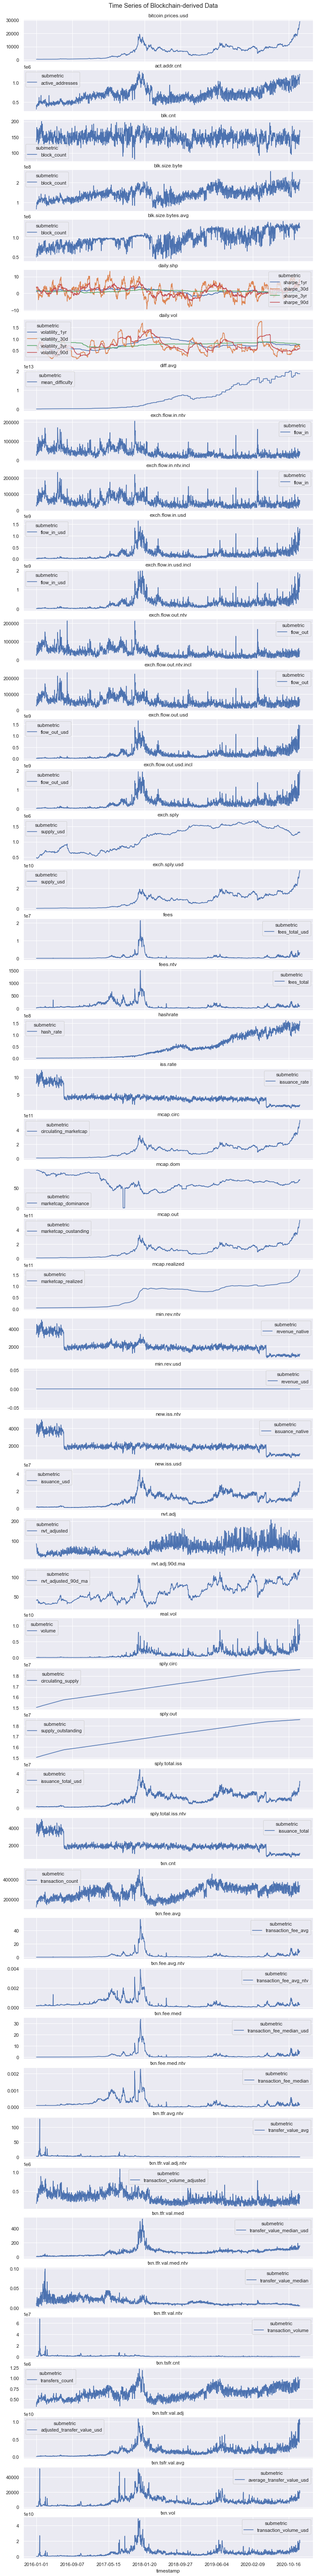

In [30]:
fig, ax = plt.subplots(nrows=51, ncols=1, sharex=True)

prices_train['close'].plot(ax=ax[0], title='bitcoin.prices.usd')

list_metrics = train_df['metric'].unique().tolist()
list_metrics.remove('price')
for metric, num in zip(list_metrics, np.arange(1, 51)):
    wide_train[metric].plot(ax=ax[num], figsize=(12,108), title=metric)

fig.suptitle('Time Series of Blockchain-derived Data', y=0.885)
# fig.savefig('../raw/tsplot_train.png', dpi=300, bbox_inches='tight')

Text(0.5, 0.885, 'Time Series of Blockchain-derived Data')

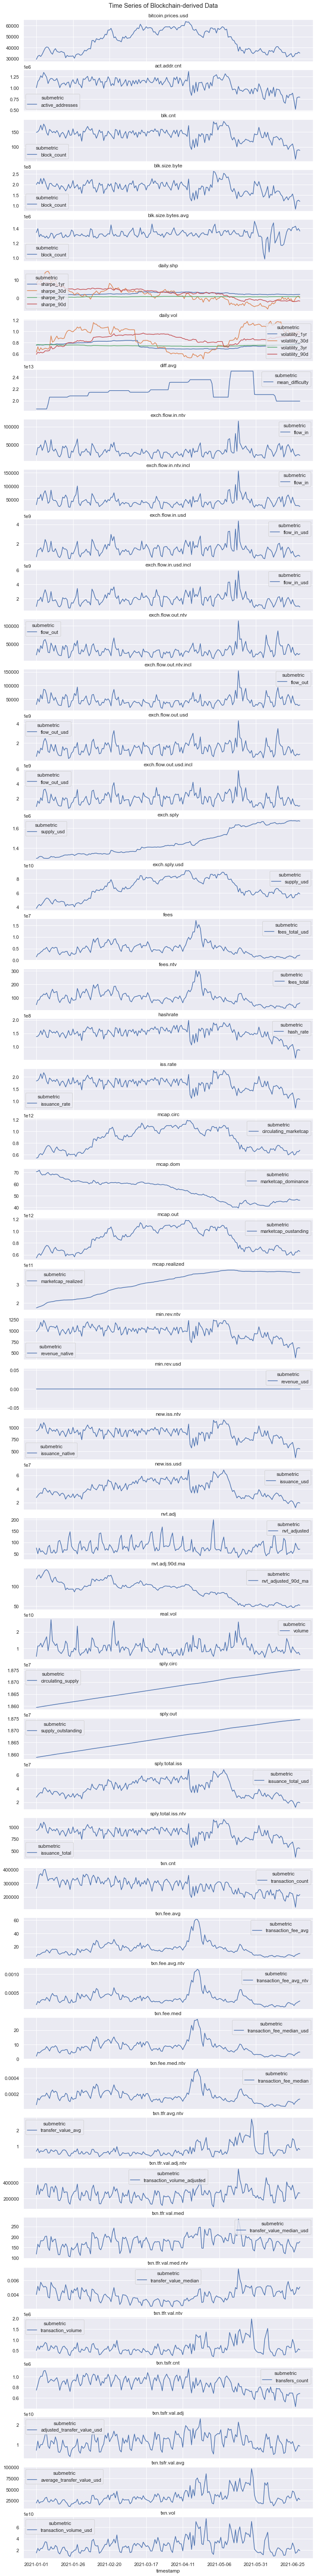

In [31]:
fig, ax = plt.subplots(nrows=51, ncols=1, sharex=True)

prices_test['close'].plot(ax=ax[0], title='bitcoin.prices.usd')

list_metrics = test_df['metric'].unique().tolist()
list_metrics.remove('price')
for metric, num in zip(list_metrics, np.arange(1, 51)):
    wide_test[metric].plot(ax=ax[num], figsize=(12,108), title=metric)

fig.suptitle('Time Series of Blockchain-derived Data', y=0.885)
# fig.savefig('../raw/tsplot_test.png', dpi=300, bbox_inches='tight')

### Predictive Modeling

In [32]:
mainmodel = pipeline.ModelPipeline(ini_dir='../config/model.ini', section='DEFAULT')

In [33]:
xtrain, ytrain = mainmodel.create_dataset(wide_train, prices_train['close'], return_train_y=True)
xtest, ytest = mainmodel.create_dataset(wide_test, prices_test['close'])

In [34]:
mainmodel.model_train(xtrain, ytrain, xtest, ytest, verbose=0)